In [1]:
from lib import *

Using an FFT package of your choice, find the power spectrum of the time series provided in the file 
http://th-www.if.uj.edu.pl/zfs/gora/timeseries21/assgn1.txt 
and plot it on a log-log scale. The noise spectrum is supposed to be flat. Set the actual sampling time as the time unit so that the Nyquist frequency is 1/2. Construct the Wiener filter, apply it to the data and plot the filtered signal. You may try using various window functions. There are 4096 points in the data file. Try doing the same using the first 2048 or 1024 data points only. I need to see the plots and I need to know what software packages, programming language and window functions you have used.


## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter implementation
## -----------------------------------------------------------------------------------------------------------------------------------

In [2]:
def noise_spectrum(f, N0):
    return N0 + f*0.0

def Wiener_filter(frequency, power_spectrum, N0):
    
    noise = noise_spectrum(frequency, N0)
    Φ = ( power_spectrum - np.abs(noise)**2) / power_spectrum 
    Φ = np.where(Φ< 0, 0, Φ)
    return Φ

def visual_comparison(frequency, power_spectrum, N, N0):
    
    noise = noise_spectrum(frequency, N0)**2
    filetr = Wiener_filter(frequency, power_spectrum, N0)
    
    fig, axs = plt.subplots(1, 2, figsize=(15,5))

    axs[0].plot(frequency, power_spectrum, c='darkblue', label = 'signal')
    axs[0].plot(frequency, noise, c='red', label = 'noise square')
    axs[1].plot(frequency, filetr, c='red')

    axs[0].set_ylabel('Power spectrum density')
    axs[1].set_ylabel('Wiener filter')

    for ax in axs:
        ax.set_xlabel('frequency')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim(1e-6, 1e4)
        ax.grid(True)
    plt.show()

    
def get_filtered_signal(frequency, power_spectrum, N0):
    
    filtr = Wiener_filter(frequency, power_spectrum, N0)
    filtr_extended = np.hstack((filtr, np.flip(filtr)))

    signal_fft = fft(signal, norm = 'ortho')     
    signal_filtred = ifft(signal_fft * filtr_extended, norm = 'ortho') 
    
    return signal_filtred

## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter -  all points included
## -----------------------------------------------------------------------------------------------------------------------------------


In [3]:
path = 'data/assgn1.txt'
number_of_points = 4096

time, signal, N, Δt, f_Nyq = get_signal(path, number_of_points)
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)

number of points 4096 Nyquist frequency: 0.5


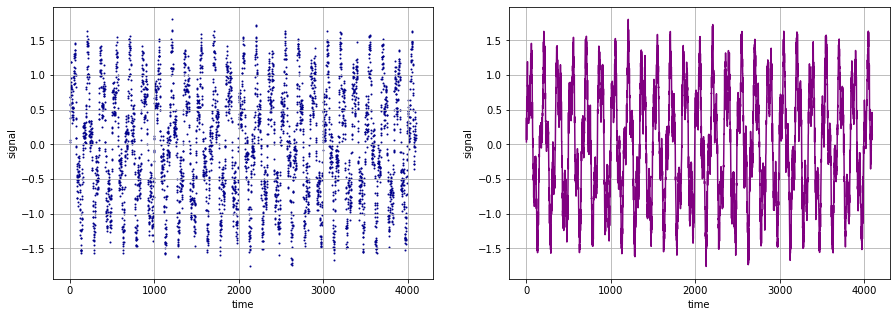

In [4]:
plot_signal(time, signal)

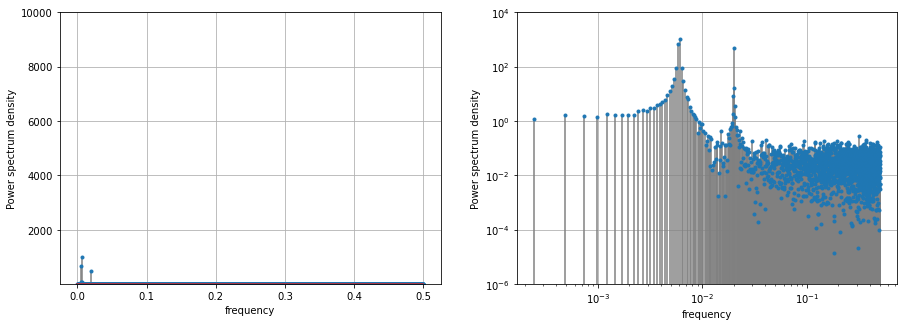

In [5]:
plot_power_spectrum(frequency, power_spectrum)

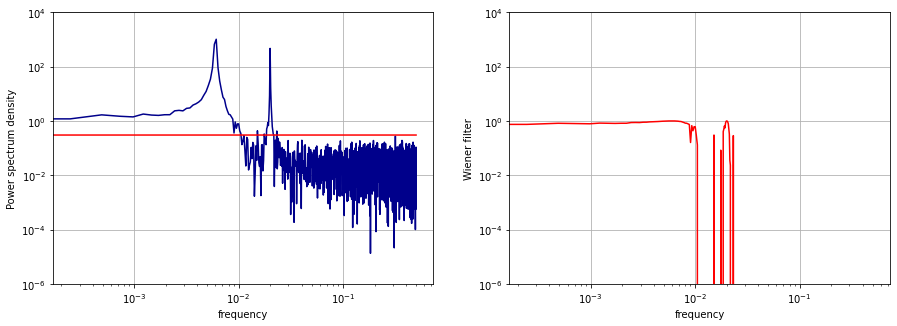

In [6]:
N0 = 0.55

signal_filtred = get_filtered_signal(frequency, power_spectrum, N0)
frequency, power_spectrum_filtred = get_power_spectrum(signal_filtred, N, Δt)
visual_comparison(frequency, power_spectrum, N, N0)

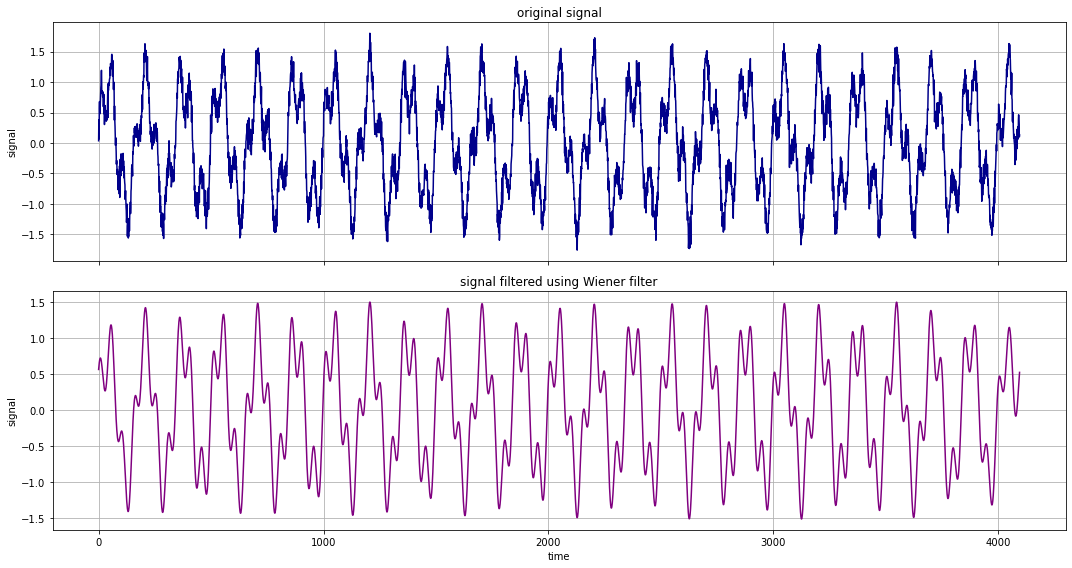

In [7]:
compare_signal(time, signal, signal_filtred)

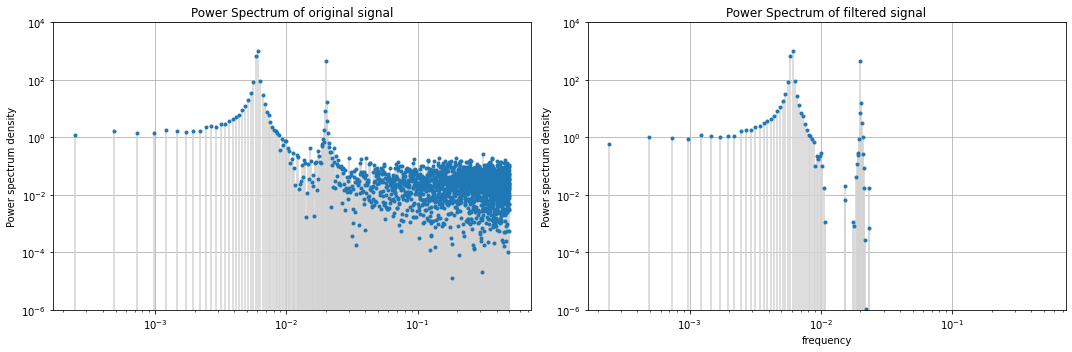

In [8]:
compare_pwd(frequency, power_spectrum, power_spectrum_filtred )

## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter:  Trying different windows
## -----------------------------------------------------------------------------------------------------------------------------------


In [9]:
def Bartlett(N):
    k = np.linspace(0, N-1, N)
    return 1- np.abs(k- 0.5*N)/ (0.5*N) 


def Hann(N):
    k = np.linspace(0, N-1, N)
    return 0.5*(1-np.cos( 2*π *k/N) )


def Welch(N):
    k = np.linspace(0, N-1, N)
    return 1-((k-0.5*N)/(0.5*N))**2

In [10]:
W_Bartlett = sum(Bartlett(N)**2)/N
W_Hann = sum(Hann(N)**2) /N
W_Welch = sum(Welch(N)**2)/N

frequency, pwd_Bartlett_pure = get_power_spectrum(Bartlett(N), N, Δt)
frequency, pwd_Hann_pure = get_power_spectrum(Hann(N), N, Δt)
frequency, pwd_Welch_pure = get_power_spectrum(Welch(N), N, Δt)

pwd_Bartlett_pure = pwd_Bartlett_pure / W_Bartlett
pwd_Hann_pure = pwd_Hann_pure / W_Hann
pwd_Welch_pure = pwd_Welch_pure / W_Welch

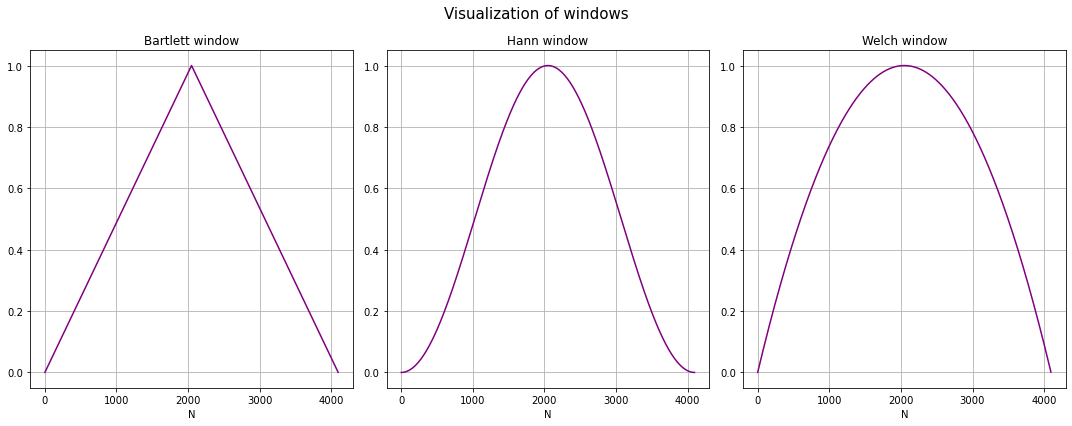

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle("Visualization of windows", fontsize =15);

axs[0].plot(Bartlett(N), c='purple')
axs[1].plot(Hann(N), c='purple')
axs[2].plot(Welch(N), c='purple')

axs[0].set_title('Bartlett window')
axs[1].set_title('Hann window')
axs[2].set_title('Welch window')

for ax in axs:
    ax.set_xlabel('N')
    ax.grid(True)
plt.tight_layout();

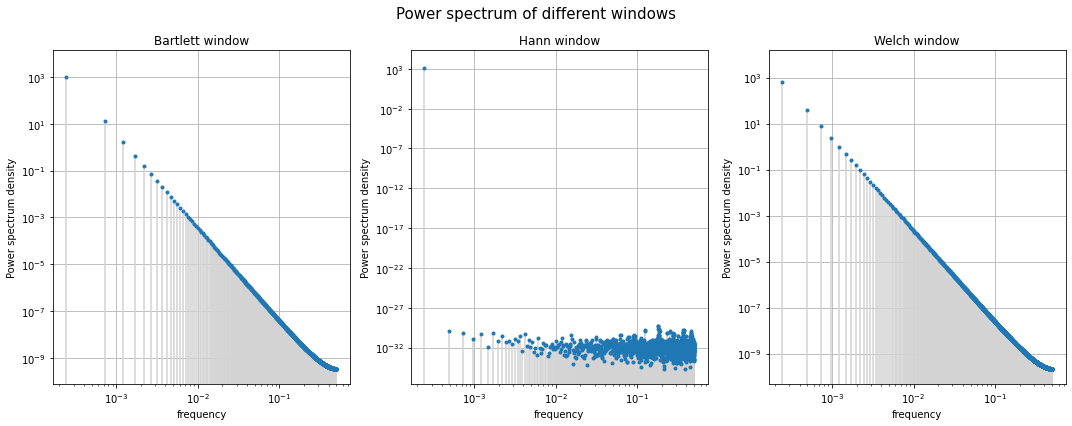

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15,6))
fig.suptitle("Power spectrum of different windows", fontsize =15);

axs[0].stem(frequency, pwd_Bartlett_pure, linefmt='lightgrey', markerfmt='.')
axs[1].stem(frequency, pwd_Hann_pure, linefmt='lightgrey', markerfmt='.')
axs[2].stem(frequency, pwd_Welch_pure, linefmt='lightgrey', markerfmt='.')

axs[0].set_title('Bartlett window')
axs[1].set_title('Hann window')
axs[2].set_title('Welch window')

for ax in axs:
    ax.set_xlabel('frequency')
    ax.set_ylabel('Power spectrum density') 
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(True)
#plt.show();
plt.tight_layout();

In [13]:
def get_signal_filtred_with_window(signal, N, Δt, N0, w = 'Bartlett' ):
    
    if w == 'Bartlett':
        window = Bartlett(N)
    elif w == 'Hann':
        window = Hann(N)
    elif w == 'Welch':
        window = Welch(N)
        
    norm = sum(window**2)/N
    frequency, pwd_window = get_power_spectrum(signal * window, N, Δt, norm = norm)
    frequency, power_spectrum = get_power_spectrum(signal, N, Δt)       
    signal_filtred_window = get_filtered_signal(frequency, pwd_window, N0)
    
    return signal_filtred_window

## Bartlett Window:

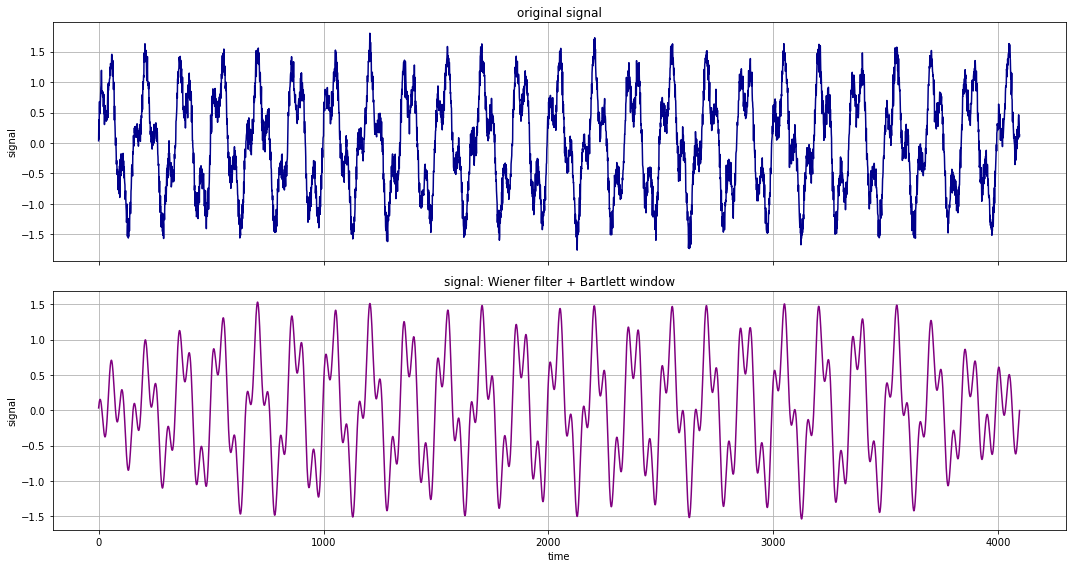

In [14]:
signal_Bartlett_filtred = get_signal_filtred_with_window(signal, N, Δt, N0, w = 'Bartlett' )
frequency, pwd_window_Bartlett = get_power_spectrum(signal_Bartlett_filtred, N, Δt)

compare_signal(time, signal, signal_Bartlett_filtred, title = "signal: Wiener filter + Bartlett window")

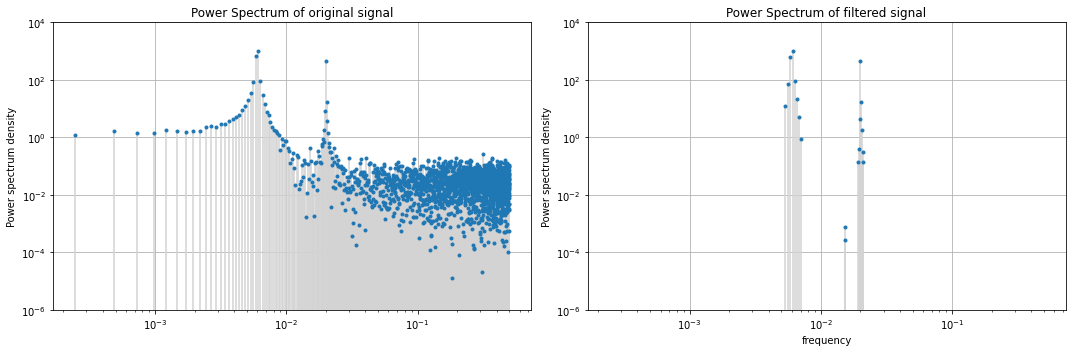

In [15]:
compare_pwd(frequency, power_spectrum, pwd_window_Bartlett )

## Hann Window:

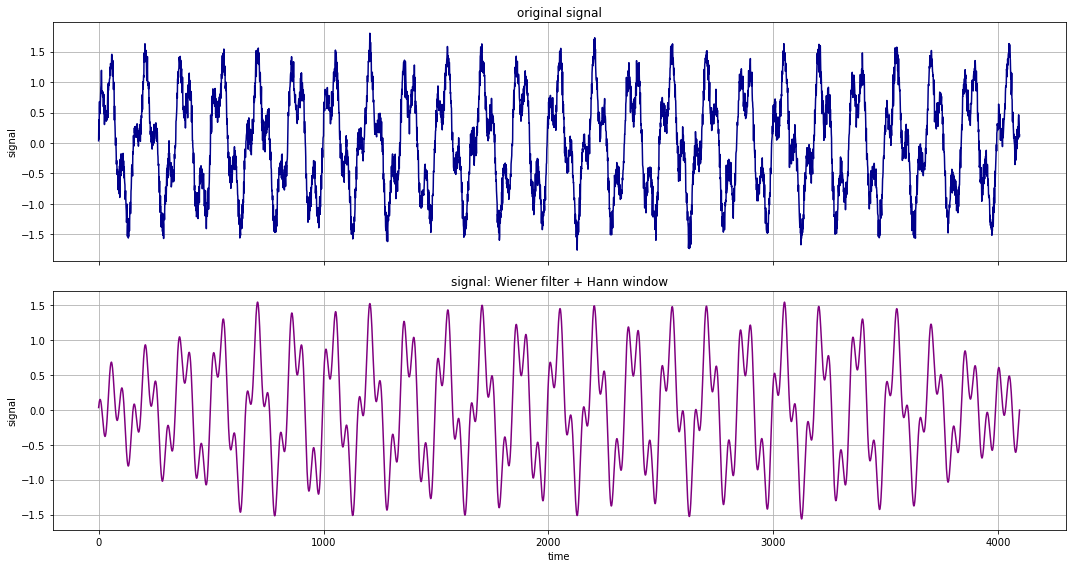

In [16]:
signal_Hann_filtred = get_signal_filtred_with_window(signal, N, Δt, N0, w = 'Hann' )
frequency, pwd_window_Hann = get_power_spectrum(signal_Hann_filtred, N, Δt)

compare_signal(time, signal, signal_Hann_filtred, title = "signal: Wiener filter + Hann window")

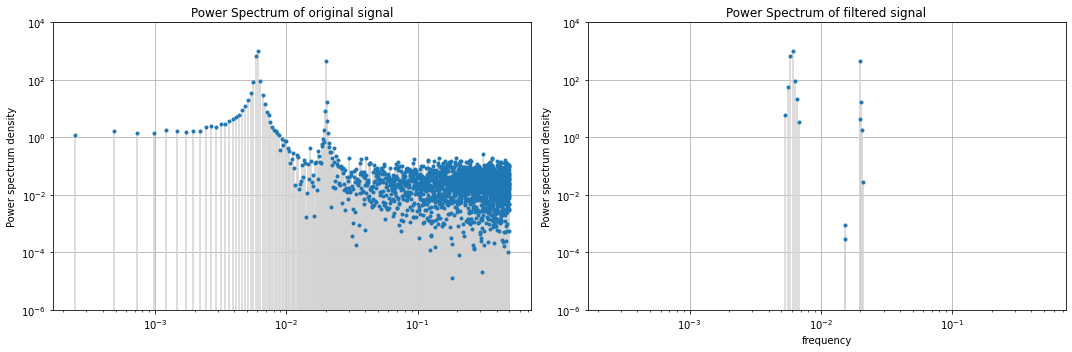

In [17]:
compare_pwd(frequency, power_spectrum, pwd_window_Hann)

## Welch Window:

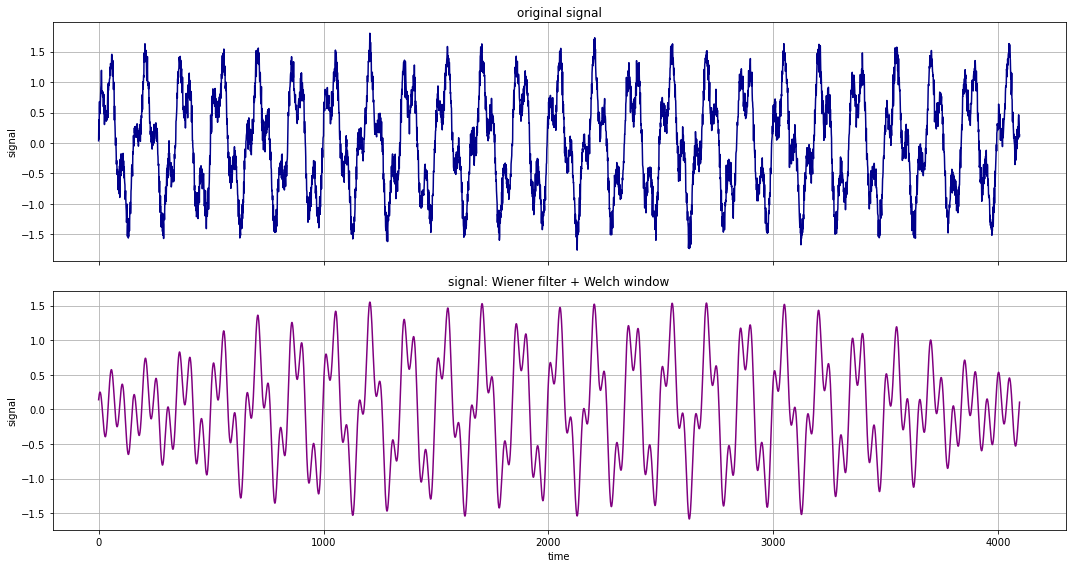

In [18]:
signal_Welch_filtred = get_signal_filtred_with_window(signal, N, Δt, N0, w = 'Welch' )
frequency, pwd_window_Welch = get_power_spectrum(signal_Welch_filtred, N, Δt)

compare_signal(time, signal, signal_Welch_filtred, title = "signal: Wiener filter + Welch window")

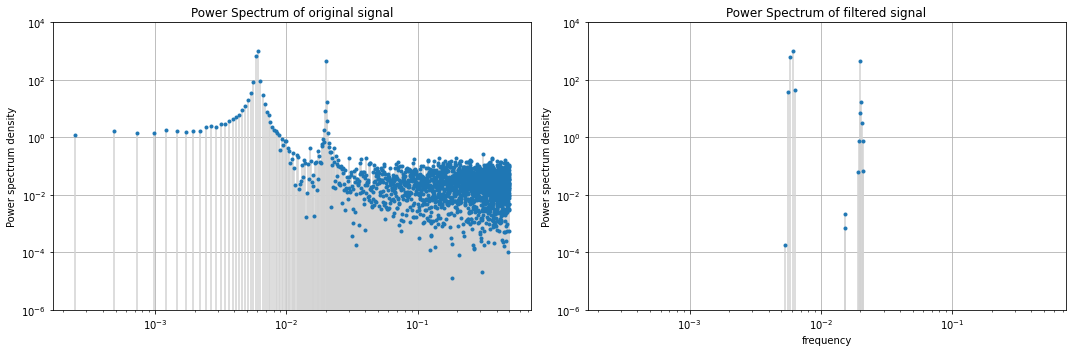

In [19]:
compare_pwd(frequency, power_spectrum, pwd_window_Welch )

## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter:  first 2048 points only
## -----------------------------------------------------------------------------------------------------------------------------------


In [20]:
path = 'data/assgn1.txt'
number_of_points = 2048

N0 = 0.55

time, signal, N, Δt, f_Nyq = get_signal(path, number_of_points)
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)

signal_filtred = get_filtered_signal(frequency, power_spectrum, N0)
frequency, power_spectrum_filtred = get_power_spectrum(signal_filtred, N, Δt)

number of points 2048 Nyquist frequency: 0.5


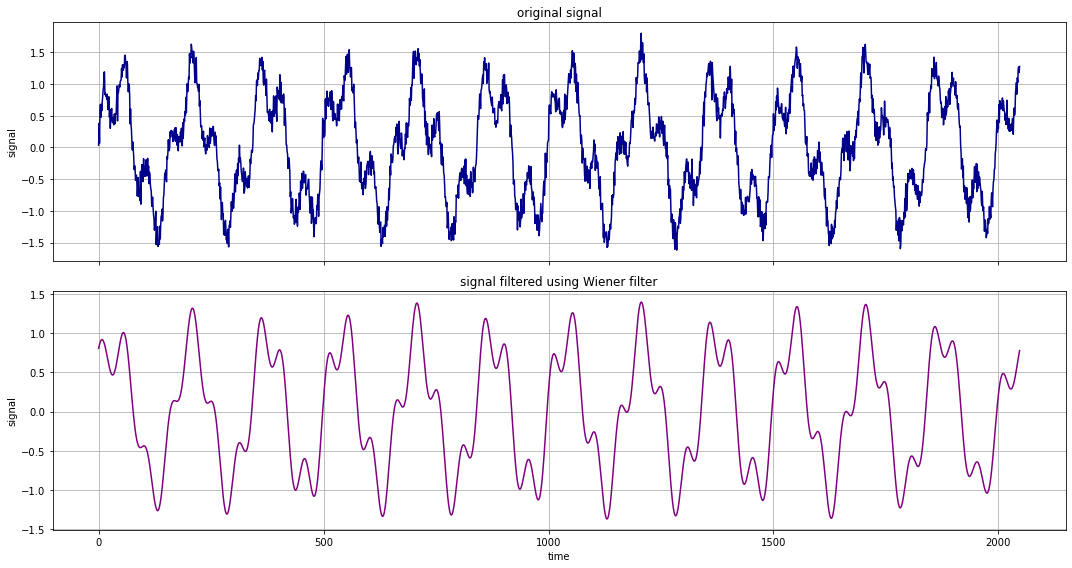

In [21]:
compare_signal(time, signal, signal_filtred)

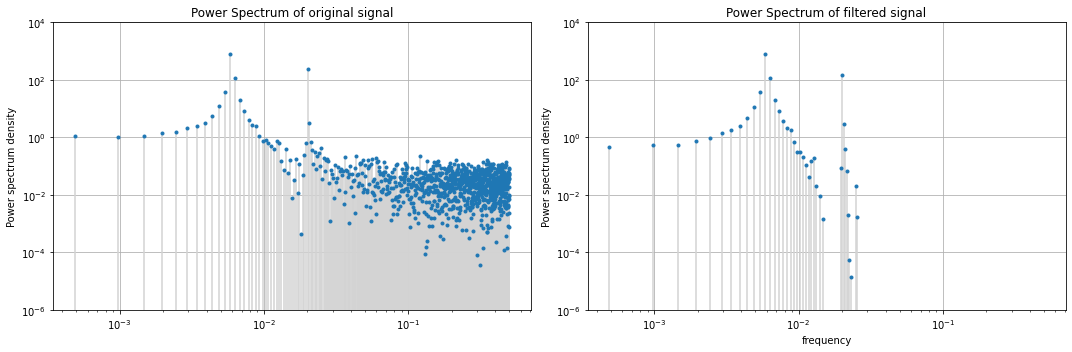

In [22]:
compare_pwd(frequency, power_spectrum, power_spectrum_filtred )

## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter:  first 1024 points only
## -----------------------------------------------------------------------------------------------------------------------------------


In [23]:
path = 'data/assgn1.txt'
number_of_points = 1024

N0 = 0.55

time, signal, N, Δt, f_Nyq = get_signal(path, number_of_points)
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)

signal_filtred = get_filtered_signal(frequency, power_spectrum, N0)
frequency, power_spectrum_filtred = get_power_spectrum(signal_filtred, N, Δt)

number of points 1024 Nyquist frequency: 0.5


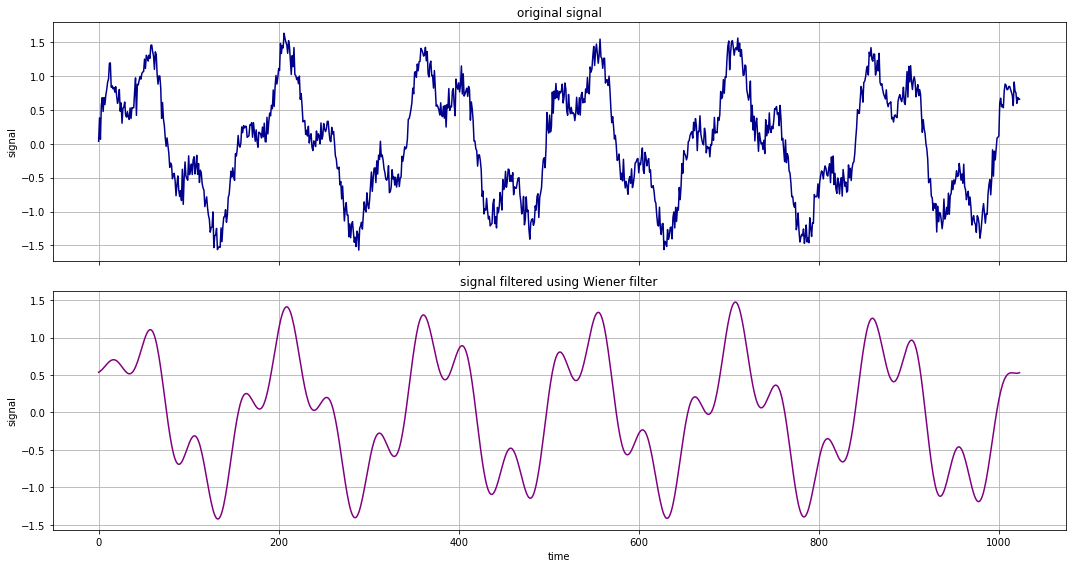

In [24]:
compare_signal(time, signal, signal_filtred)

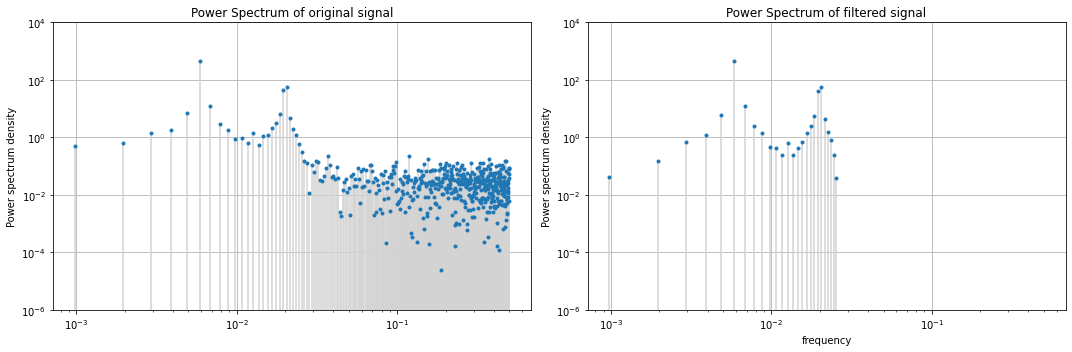

In [25]:
compare_pwd(frequency, power_spectrum, power_spectrum_filtred )

## -----------------------------------------------------------------------------------------------------------------------------------


# Assignment 2

Using an FFT package of your choice, find the power spectrum of the time series provided in the file 
http://th-www.if.uj.edu.pl/zfs/gora/timeseries21/assgn2.txt
and plot it on a log-log scale. The noise spectrum is supposed to be flat. Set the actual sampling time as the time unit so that the Nyquist frequency is 1/2. Construct the Wiener filter, apply it to the data and plot the filtered signal. You may try using various window functions. There are 4096 points in the data file. Try doing the same using the first 2048 or 1024 data points only.

The noise background is supposed to have the power spectrum:
$$N(f) = \frac{\alpha^2}{1+ \beta^2 - 2\beta \cos \left( 2\pi \frac{f}{\tilde f}\right)}$$

where $\tilde{f}$ sets the scale so that Nyquist frequency equals $\frac{1}{2}$.$ \alpha^2$ and $\beta$ are the parameters that actuallyneed  to  be  fitted.   The  fit  may  be  quite  rough,  do  not  waste  too  much  time  on  fine-tuning  theseparameters

## -----------------------------------------------------------------------------------------------------------------------------------


## -----------------------------------------------------------------------------------------------------------------------------------
### Wiener Filter - implementation
## -----------------------------------------------------------------------------------------------------------------------------------

In [26]:
def noise_spectrum(f, f0, α, β):
    return α**2/(1 + β**2 - 2* β * np.cos(2 * π * f/f0 ) )


def Wiener_filter(frequency, power_spectrum, f0, α, β):
    
    noise = noise_spectrum(frequency, f0, α, β)
    Φ = ( power_spectrum - np.power(np.abs(noise), 2) ) / power_spectrum 
    Φ = np.where(Φ< 0, 0, Φ)
    
    return Φ


def visual_comparison(frequency, power_spectrum, N, f0, α, β):
    
    noise = noise_spectrum(frequency, f0, α, β) **2
    filetr = Wiener_filter(frequency, power_spectrum, f0, α, β)
    
    fig, axs = plt.subplots(1, 2, figsize=(15,5))

    axs[0].stem(frequency, power_spectrum, linefmt='grey', markerfmt='.', label = 'signal')
    axs[0].plot(frequency, noise, c='red', label = 'noise square')
    axs[1].plot(frequency, filetr, c='red')

    axs[0].set_ylabel('Power spectrum density')
    axs[1].set_ylabel('Wiener filter')

    for ax in axs:
        ax.set_xlabel('frequency')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim(1e-6, 1e4)
        ax.grid(True)
    plt.show()

    
def get_filtered_signal(frequency, power_spectrum, f0, α, β):
    
    filtr = Wiener_filter(frequency, power_spectrum, f0, α, β)
    filtr_extended = np.hstack((filtr, np.flip(filtr)))

    signal_fft = fft(signal, norm = 'ortho')     
    signal_filtred = ifft(signal_fft * filtr_extended, norm = 'ortho') 
    
    return signal_filtred

## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter -  all points included
## -----------------------------------------------------------------------------------------------------------------------------------


In [27]:
path = 'data/assgn2.txt'
number_of_points = 4096

time, signal, N, Δt, f_Nyq = get_signal(path, number_of_points)
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)

number of points 4096 Nyquist frequency: 0.5


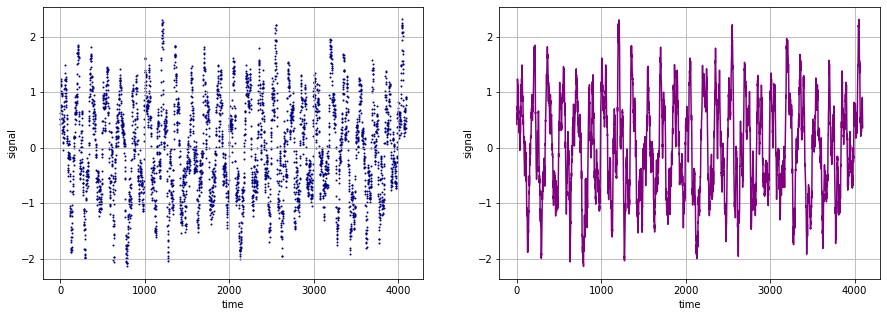

In [28]:
plot_signal(time, signal)

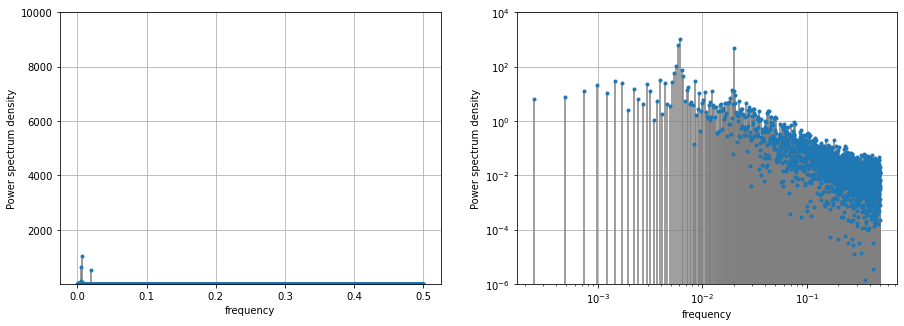

In [29]:
plot_power_spectrum(frequency, power_spectrum)

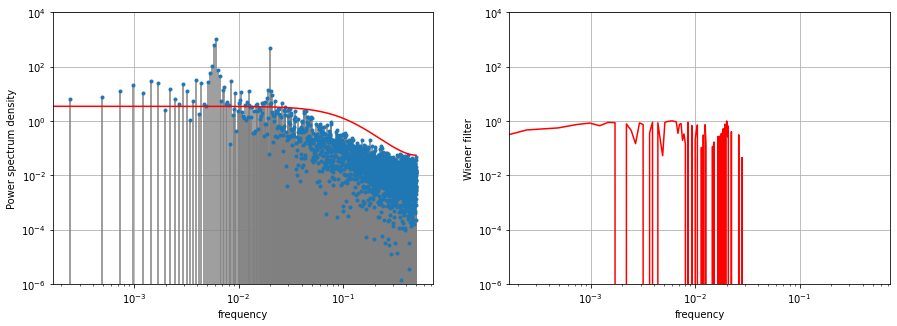

In [30]:
α = 1.5
β = 2.1
f0 = 1.0

signal_filtred = get_filtered_signal(frequency, power_spectrum, f0, α, β)
frequency, power_spectrum_filtred = get_power_spectrum(signal_filtred, N, Δt)

visual_comparison(frequency, power_spectrum, N, f0, α, β)

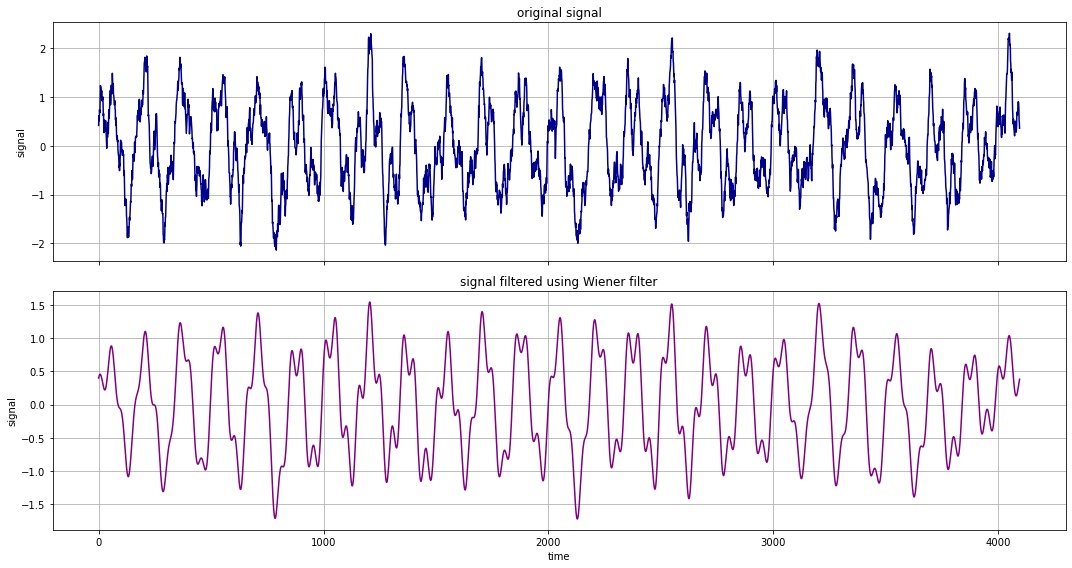

In [31]:
compare_signal(time, signal, signal_filtred)

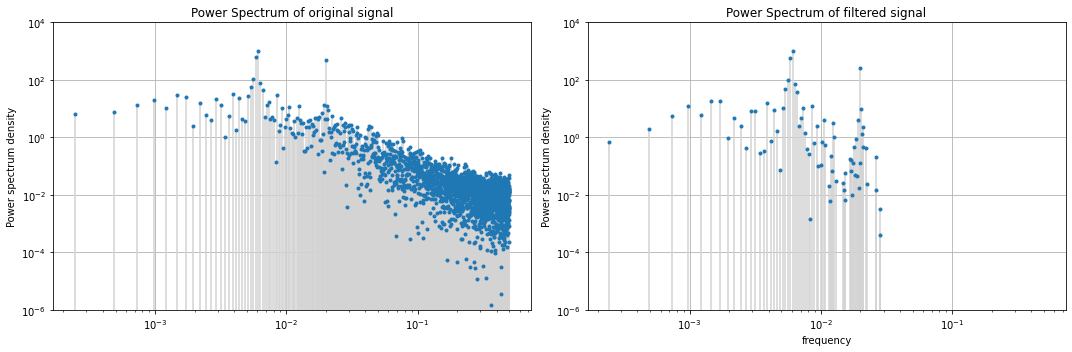

In [32]:
compare_pwd(frequency, power_spectrum, power_spectrum_filtred )

## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter: first 2048 points only
## -----------------------------------------------------------------------------------------------------------------------------------


In [33]:
path = 'data/assgn2.txt'
number_of_points = 2048

α = 1.5
β = 2.1
f0 = 1.0

time, signal, N, Δt, f_Nyq = get_signal(path, number_of_points)
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)

signal_filtred = get_filtered_signal(frequency, power_spectrum, f0, α, β)
frequency, power_spectrum_filtred = get_power_spectrum(signal_filtred, N, Δt)

number of points 2048 Nyquist frequency: 0.5


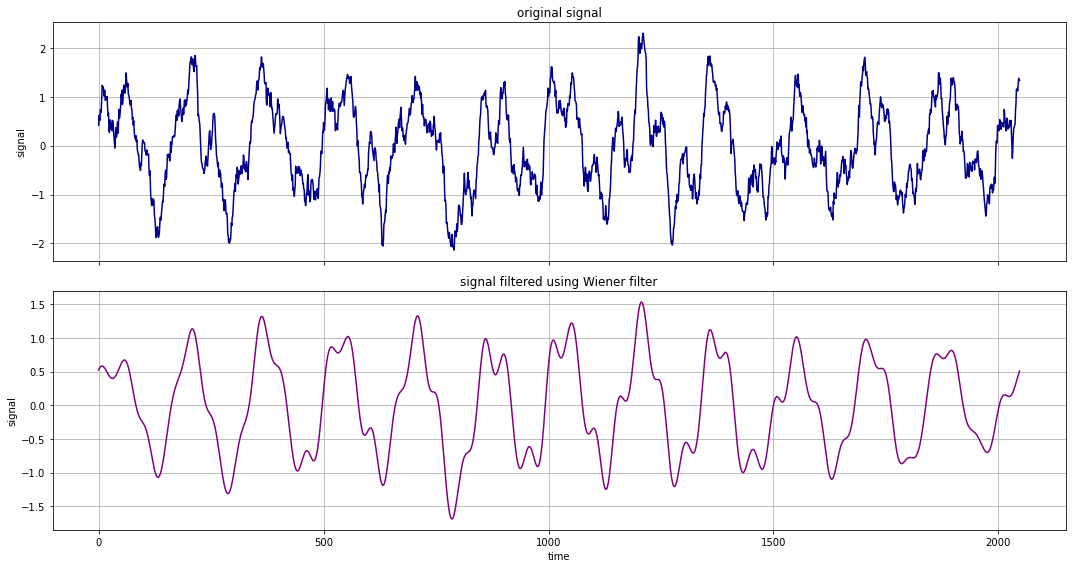

In [34]:
compare_signal(time, signal, signal_filtred)

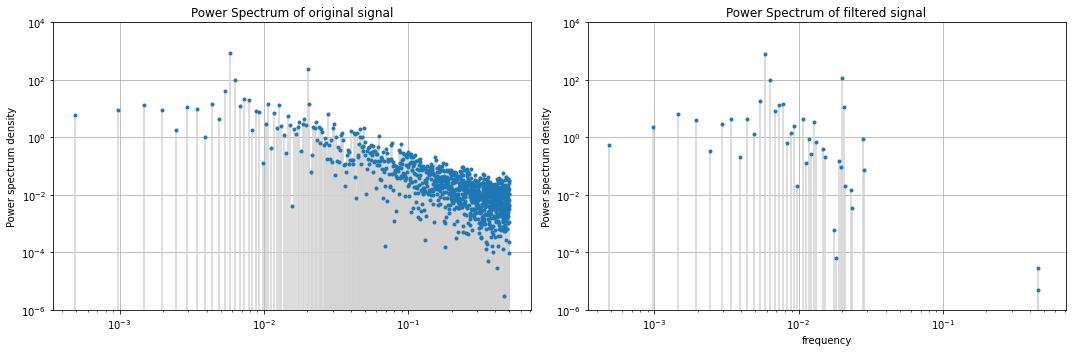

In [35]:
compare_pwd(frequency, power_spectrum, power_spectrum_filtred)

## -----------------------------------------------------------------------------------------------------------------------------------
## Wiener filter: first 1024 points only
## -----------------------------------------------------------------------------------------------------------------------------------


In [36]:
path = 'data/assgn2.txt'
number_of_points = 1024

α = 1.5
β = 2.1
f0 = 1.0

time, signal, N, Δt, f_Nyq = get_signal(path, number_of_points)
frequency, power_spectrum = get_power_spectrum(signal, N, Δt)

signal_filtred = get_filtered_signal(frequency, power_spectrum, f0, α, β)
frequency, power_spectrum_filtred = get_power_spectrum(signal_filtred, N, Δt)

number of points 1024 Nyquist frequency: 0.5


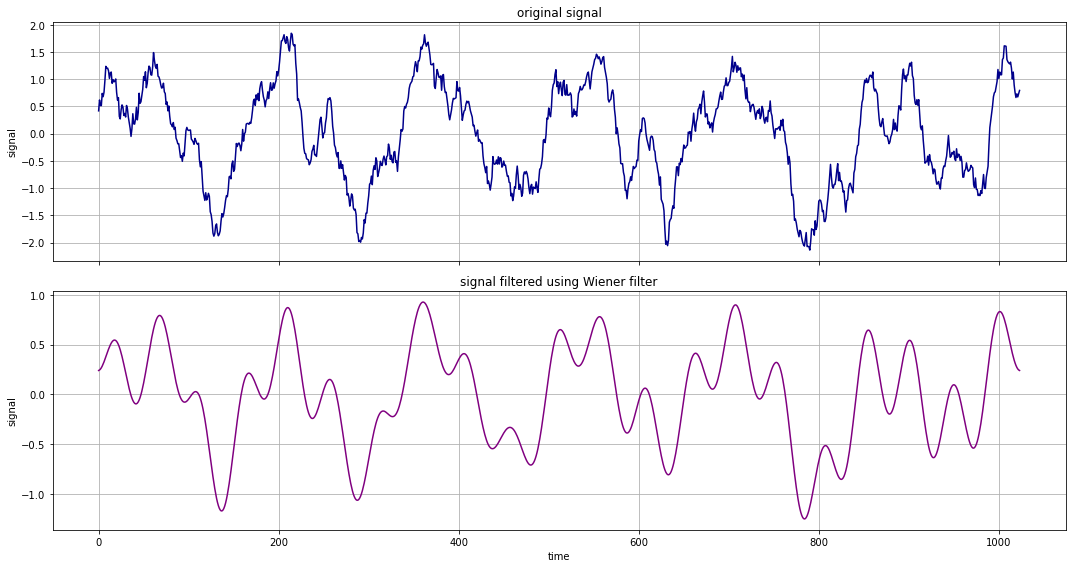

In [37]:
compare_signal(time, signal, signal_filtred)

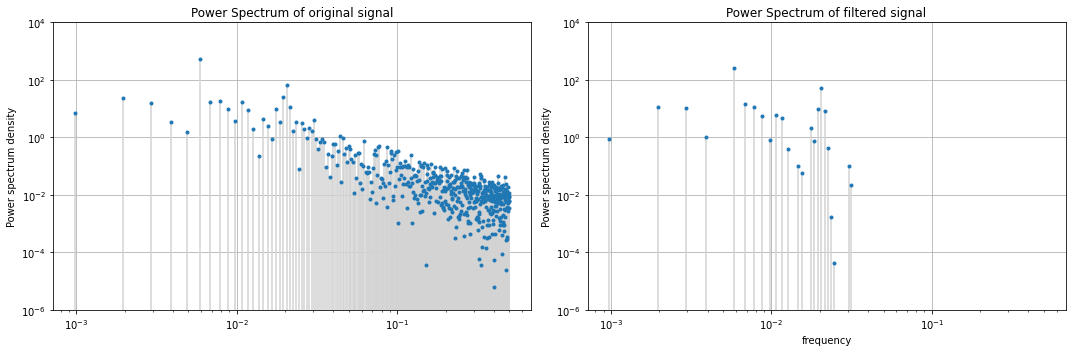

In [38]:
compare_pwd(frequency, power_spectrum, power_spectrum_filtred)